In [1]:
import numpy as pd
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

# 1. Charger les donnnees

In [2]:
traffic_reseau = pd.read_csv('dataset_sdn.csv')

In [3]:
traffic_reseau

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


# 2. Analyse de la dataset

In [4]:
traffic_reseau.shape

(104345, 23)

In [5]:
traffic_reseau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  object 
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [6]:
traffic_reseau['src'].unique()

array(['10.0.0.1', '10.0.0.2', '10.0.0.4', '10.0.0.10', '10.0.0.3',
       '10.0.0.5', '10.0.0.13', '10.0.0.6', '10.0.0.20', '10.0.0.11',
       '10.0.0.12', '10.0.0.18', '10.0.0.8', '10.0.0.7', '10.0.0.9',
       '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17'], dtype=object)

In [7]:
traffic_reseau['dst'].unique()

array(['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10',
       '10.0.0.13', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.4',
       '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12',
       '10.0.0.16', '10.0.0.17', '10.0.0.18'], dtype=object)

In [8]:
traffic_reseau['Protocol'].unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [9]:
traffic_reseau.columns

Index(['dt', 'switch', 'src', 'dst', 'pktcount', 'bytecount', 'dur',
       'dur_nsec', 'tot_dur', 'flows', 'packetins', 'pktperflow',
       'byteperflow', 'pktrate', 'Pairflow', 'Protocol', 'port_no', 'tx_bytes',
       'rx_bytes', 'tx_kbps', 'rx_kbps', 'tot_kbps', 'label'],
      dtype='object')

In [10]:
traffic_reseau.isnull().sum()

dt               0
switch           0
src              0
dst              0
pktcount         0
bytecount        0
dur              0
dur_nsec         0
tot_dur          0
flows            0
packetins        0
pktperflow       0
byteperflow      0
pktrate          0
Pairflow         0
Protocol         0
port_no          0
tx_bytes         0
rx_bytes         0
tx_kbps          0
rx_kbps        506
tot_kbps       506
label            0
dtype: int64

In [11]:
traffic_reseau['rx_kbps'].fillna(traffic_reseau['rx_kbps'].mean(), inplace=True)
traffic_reseau['tot_kbps'].fillna(traffic_reseau['tot_kbps'].mean(), inplace=True)

C:\Users\MWAMBA\AppData\Local\Temp\ipykernel_15844\1931614456.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  traffic_reseau['rx_kbps'].fillna(traffic_reseau['rx_kbps'].mean(), inplace=True)
C:\Users\MWAMBA\AppData\Local\Temp\ipykernel_15844\1931614456.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values 

In [12]:
traffic_reseau.isnull().sum()

dt             0
switch         0
src            0
dst            0
pktcount       0
bytecount      0
dur            0
dur_nsec       0
tot_dur        0
flows          0
packetins      0
pktperflow     0
byteperflow    0
pktrate        0
Pairflow       0
Protocol       0
port_no        0
tx_bytes       0
rx_bytes       0
tx_kbps        0
rx_kbps        0
tot_kbps       0
label          0
dtype: int64

In [13]:
# traffic_reseau['tot_kbps'].fillna(traffic_reseau['tot_kbps'].mean(), inplace=True)

In [14]:
traffic_reseau['pktcount'].value_counts()

pktcount
999       713
129999    212
1         162
284       145
20        144
         ... 
122720      2
21810       2
64597       2
12099       2
134940      1
Name: count, Length: 9045, dtype: int64

In [15]:
traffic_reseau['src'].value_counts()

src
10.0.0.3     11491
10.0.0.7     10313
10.0.0.10     9671
10.0.0.1      8645
10.0.0.12     8147
10.0.0.2      8063
10.0.0.5      7291
10.0.0.9      7209
10.0.0.11     6455
10.0.0.4      5999
10.0.0.8      5241
10.0.0.6      2740
10.0.0.18     2590
10.0.0.13     2484
10.0.0.14     2265
10.0.0.15     1858
10.0.0.16     1789
10.0.0.20     1114
10.0.0.17      980
Name: count, dtype: int64

In [16]:
traffic_reseau['dst'].value_counts()

dst
10.0.0.7     18020
10.0.0.8     15587
10.0.0.5     15184
10.0.0.3     13051
10.0.0.9      6318
10.0.0.12     5635
10.0.0.2      4990
10.0.0.1      4645
10.0.0.4      3963
10.0.0.10     3926
10.0.0.11     3370
10.0.0.14     2007
10.0.0.15     1765
10.0.0.16     1684
10.0.0.6      1590
10.0.0.13     1076
10.0.0.18      790
10.0.0.17      744
Name: count, dtype: int64

In [17]:
traffic_reseau

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,UDP,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,UDP,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,UDP,3,3413,3665,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,1,15209,12720,1,1.0,2.0,0
104341,5262,3,10.0.0.5,10.0.0.7,79,7742,81,842000000,8.184200e+10,5,...,0,0,ICMP,3,15099,14693,1,1.0,2.0,0
104342,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,2,3409,3731,0,0.0,0.0,0
104343,5262,3,10.0.0.11,10.0.0.5,31,3038,31,805000000,3.180500e+10,5,...,1,0,ICMP,1,15209,12720,1,1.0,2.0,0


In [18]:
traffic_reseau['Protocol'].unique()

array(['UDP', 'TCP', 'ICMP'], dtype=object)

In [19]:
# Mapping Protocol
Protocole_mapping = {
    'UDP':1,
    'TCP':2,
    'ICMP':3
}

traffic_reseau['Protocol'] = traffic_reseau['Protocol'].map(Protocole_mapping)

In [20]:
traffic_reseau.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,10.0.0.1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,1,3,143928631,3917,0,0.0,0.0,0
1,11605,1,10.0.0.1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,1,4,3842,3520,0,0.0,0.0,0
2,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,1,3795,1242,0,0.0,0.0,0
3,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,2,3688,1492,0,0.0,0.0,0
4,11425,1,10.0.0.2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,3,3413,3665,0,0.0,0.0,0


In [21]:
traffic_reseau['Protocol'].unique()

array([1, 2, 3])

In [22]:
traffic_reseau.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104345 entries, 0 to 104344
Data columns (total 23 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   dt           104345 non-null  int64  
 1   switch       104345 non-null  int64  
 2   src          104345 non-null  object 
 3   dst          104345 non-null  object 
 4   pktcount     104345 non-null  int64  
 5   bytecount    104345 non-null  int64  
 6   dur          104345 non-null  int64  
 7   dur_nsec     104345 non-null  int64  
 8   tot_dur      104345 non-null  float64
 9   flows        104345 non-null  int64  
 10  packetins    104345 non-null  int64  
 11  pktperflow   104345 non-null  int64  
 12  byteperflow  104345 non-null  int64  
 13  pktrate      104345 non-null  int64  
 14  Pairflow     104345 non-null  int64  
 15  Protocol     104345 non-null  int64  
 16  port_no      104345 non-null  int64  
 17  tx_bytes     104345 non-null  int64  
 18  rx_bytes     104345 non-

In [23]:
traffic_reseau['src'].unique()

array(['10.0.0.1', '10.0.0.2', '10.0.0.4', '10.0.0.10', '10.0.0.3',
       '10.0.0.5', '10.0.0.13', '10.0.0.6', '10.0.0.20', '10.0.0.11',
       '10.0.0.12', '10.0.0.18', '10.0.0.8', '10.0.0.7', '10.0.0.9',
       '10.0.0.14', '10.0.0.15', '10.0.0.16', '10.0.0.17'], dtype=object)

In [24]:
# IP Source Mapping
IP_source_mapping = {
    '10.0.0.1':1, 
    '10.0.0.2':2, 
    '10.0.0.4':4, 
    '10.0.0.10':10, 
    '10.0.0.3':3,
       '10.0.0.5':5, 
    '10.0.0.13':13, 
    '10.0.0.6':6, 
    '10.0.0.20':20, 
    '10.0.0.11':11,
       '10.0.0.12':12, 
    '10.0.0.18':18, 
    '10.0.0.8':8, 
    '10.0.0.7':7, 
    '10.0.0.9':9,
       '10.0.0.14':14, 
    '10.0.0.15':15, 
    '10.0.0.16':16, 
    '10.0.0.17':17
}

traffic_reseau['src'] = traffic_reseau['src'].map(IP_source_mapping)

In [25]:
traffic_reseau.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,1,10.0.0.8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,1,3,143928631,3917,0,0.0,0.0,0
1,11605,1,1,10.0.0.8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,1,4,3842,3520,0,0.0,0.0,0
2,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,1,3795,1242,0,0.0,0.0,0
3,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,2,3688,1492,0,0.0,0.0,0
4,11425,1,2,10.0.0.8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,3,3413,3665,0,0.0,0.0,0


In [26]:
traffic_reseau['dst'].unique()

array(['10.0.0.8', '10.0.0.7', '10.0.0.3', '10.0.0.5', '10.0.0.10',
       '10.0.0.13', '10.0.0.1', '10.0.0.11', '10.0.0.2', '10.0.0.4',
       '10.0.0.9', '10.0.0.6', '10.0.0.14', '10.0.0.15', '10.0.0.12',
       '10.0.0.16', '10.0.0.17', '10.0.0.18'], dtype=object)

In [27]:
# IP Dest Mapping
IP_Dst_Mapping = {
    '10.0.0.8':8, 
    '10.0.0.7':7, 
    '10.0.0.3':3, 
    '10.0.0.5':5, 
    '10.0.0.10':10,
       '10.0.0.13':13, 
    '10.0.0.1':1, 
    '10.0.0.11':11, 
    '10.0.0.2':2, 
    '10.0.0.4':4,
       '10.0.0.9':9, 
    '10.0.0.6':6, 
    '10.0.0.14':14, 
    '10.0.0.15':15, 
    '10.0.0.12':12,
       '10.0.0.16':16, 
    '10.0.0.17':17, 
    '10.0.0.18':18
}

traffic_reseau['dst'] = traffic_reseau['dst'].map(IP_Dst_Mapping)

In [28]:
traffic_reseau.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,1,8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,1,3,143928631,3917,0,0.0,0.0,0
1,11605,1,1,8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,1,4,3842,3520,0,0.0,0.0,0
2,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,1,3795,1242,0,0.0,0.0,0
3,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,2,3688,1492,0,0.0,0.0,0
4,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,3,3413,3665,0,0.0,0.0,0


# 3. Separation de  donnees

In [29]:
# Separation de donnees

traffic_reseau.loc[1:2]

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
1,11605,1,1,8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,1,4,3842,3520,0,0.0,0.0,0
2,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,1,3795,1242,0,0.0,0.0,0


In [30]:
traffic_reseau.head()

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,11425,1,1,8,45304,48294064,100,716000000,1.010000e+11,3,...,451,0,1,3,143928631,3917,0,0.0,0.0,0
1,11605,1,1,8,126395,134737070,280,734000000,2.810000e+11,2,...,451,0,1,4,3842,3520,0,0.0,0.0,0
2,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,1,3795,1242,0,0.0,0.0,0
3,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,2,3688,1492,0,0.0,0.0,0
4,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,451,0,1,3,3413,3665,0,0.0,0.0,0


In [31]:
traffic_reseau.iloc[1:4, 2:4]

,src,dst
1,1,8
2,2,8
3,2,8


In [32]:
X = traffic_reseau.iloc[ :, :-1]

In [33]:
X

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,11425,1,1,8,45304,48294064,100,716000000,1.010000e+11,3,...,14428310,451,0,1,3,143928631,3917,0,0.0,0.0
1,11605,1,1,8,126395,134737070,280,734000000,2.810000e+11,2,...,14424046,451,0,1,4,3842,3520,0,0.0,0.0
2,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,14427244,451,0,1,1,3795,1242,0,0.0,0.0
3,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,14427244,451,0,1,2,3688,1492,0,0.0,0.0
4,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,14427244,451,0,1,3,3413,3665,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,5,7,79,7742,81,842000000,8.184200e+10,5,...,2842,0,0,3,1,15209,12720,1,1.0,2.0
104341,5262,3,5,7,79,7742,81,842000000,8.184200e+10,5,...,2842,0,0,3,3,15099,14693,1,1.0,2.0
104342,5262,3,11,5,31,3038,31,805000000,3.180500e+10,5,...,2940,1,0,3,2,3409,3731,0,0.0,0.0
104343,5262,3,11,5,31,3038,31,805000000,3.180500e+10,5,...,2940,1,0,3,1,15209,12720,1,1.0,2.0


In [34]:
y = traffic_reseau.iloc[:,-1]

In [35]:
y

0         0
1         0
2         0
3         0
4         0
         ..
104340    0
104341    0
104342    0
104343    0
104344    0
Name: label, Length: 104345, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
X_train.shape

(83476, 22)

In [38]:
print("X train:", X_train.shape)
print("y train:", y_train.shape)

X train: (83476, 22)
y train: (83476,)


In [39]:
print("X test:", X_test.shape)
print("y test:", y_test.shape)

X test: (20869, 22)
y test: (20869,)


# 4. Creation des Algorithmes

## 4.1 Logistic Regression

In [40]:
from sklearn.linear_model import LogisticRegression

In [41]:
# Creation d'une variable
lr_model = LogisticRegression()

In [42]:
# Entrainement
lr_model.fit(X_train, y_train)

C:\Users\MWAMBA\anaconda3\envs\bac3_SI_env_2\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [43]:
y_pred_logistic = lr_model.predict(X_test)

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
confusion_matrix(y_test, y_pred_logistic)

array([[9335, 3387],
       [4986, 3161]])

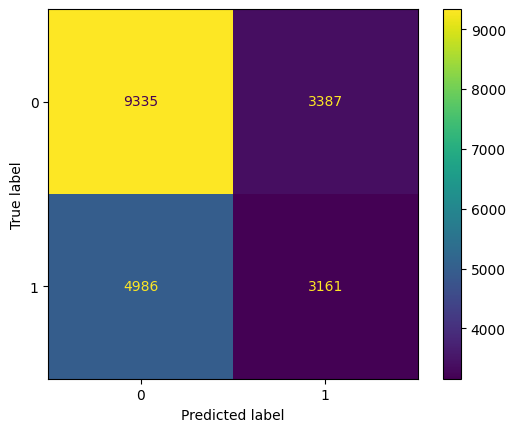

In [46]:
ConfusionMatrixDisplay.from_estimator(lr_model, X_test, y_test)

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, mean_squared_error

In [48]:
print("Accuracy de Logistic Regression:", accuracy_score(y_test, y_pred_logistic) * 100)

Accuracy de Logistic Regression: 59.87828837031003


## 4.2 Random Forest

In [50]:
random_forest_model = RandomForestClassifier()

In [51]:
random_forest_model.fit(X_train, y_train)

RandomForestClassifier()

In [52]:
y_pred_rf = random_forest_model.predict(X_test)

In [53]:
y_pred_rf

array([0, 1, 0, ..., 0, 1, 0])

In [54]:
confusion_matrix(y_test, y_pred_rf)

array([[12722,     0],
       [    0,  8147]])

In [55]:
accuracy_score(y_test, y_pred_rf)

1.0

In [56]:
X

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,...,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,11425,1,1,8,45304,48294064,100,716000000,1.010000e+11,3,...,14428310,451,0,1,3,143928631,3917,0,0.0,0.0
1,11605,1,1,8,126395,134737070,280,734000000,2.810000e+11,2,...,14424046,451,0,1,4,3842,3520,0,0.0,0.0
2,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,14427244,451,0,1,1,3795,1242,0,0.0,0.0
3,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,14427244,451,0,1,2,3688,1492,0,0.0,0.0
4,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,...,14427244,451,0,1,3,3413,3665,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,5,7,79,7742,81,842000000,8.184200e+10,5,...,2842,0,0,3,1,15209,12720,1,1.0,2.0
104341,5262,3,5,7,79,7742,81,842000000,8.184200e+10,5,...,2842,0,0,3,3,15099,14693,1,1.0,2.0
104342,5262,3,11,5,31,3038,31,805000000,3.180500e+10,5,...,2940,1,0,3,2,3409,3731,0,0.0,0.0
104343,5262,3,11,5,31,3038,31,805000000,3.180500e+10,5,...,2940,1,0,3,1,15209,12720,1,1.0,2.0


In [57]:
pd.set_option('display.max_columns', None)

In [58]:
X

,dt,switch,src,dst,pktcount,bytecount,dur,dur_nsec,tot_dur,flows,packetins,pktperflow,byteperflow,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps
0,11425,1,1,8,45304,48294064,100,716000000,1.010000e+11,3,1943,13535,14428310,451,0,1,3,143928631,3917,0,0.0,0.0
1,11605,1,1,8,126395,134737070,280,734000000,2.810000e+11,2,1943,13531,14424046,451,0,1,4,3842,3520,0,0.0,0.0
2,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,1,3795,1242,0,0.0,0.0
3,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,2,3688,1492,0,0.0,0.0
4,11425,1,2,8,90333,96294978,200,744000000,2.010000e+11,3,1943,13534,14427244,451,0,1,3,3413,3665,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104340,5262,3,5,7,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,3,1,15209,12720,1,1.0,2.0
104341,5262,3,5,7,79,7742,81,842000000,8.184200e+10,5,10,29,2842,0,0,3,3,15099,14693,1,1.0,2.0
104342,5262,3,11,5,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,3,2,3409,3731,0,0.0,0.0
104343,5262,3,11,5,31,3038,31,805000000,3.180500e+10,5,10,30,2940,1,0,3,1,15209,12720,1,1.0,2.0


## Simple prediction

In [59]:
random_forest_model.predict([[11425,	1,	1,	8,	45304,	48294064,	100,	716000000,	1.010000e+11,	3,	1943,	13535,	14428310,	451,	0,	1,	3,	143928631,	3917,	0,	0.0,	0.0
]])

C:\Users\MWAMBA\anaconda3\envs\bac3_SI_env_2\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])